In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [70]:
df = pd.read_excel('/content/raw_house_data - raw_house_data.xlsx')

In [71]:
df.dropna(inplace=True)

In [72]:
df.fillna(df.mean(), inplace=True)


<ipython-input-72-bf934754a5b1>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [73]:
df.drop_duplicates(inplace=True)


In [74]:
df.drop(['MLS','longitude','latitude','kitchen_features','floor_covering'], axis=1, inplace=True)


In [75]:
print(df.dtypes)


sold_price    float64
zipcode         int64
lot_acres     float64
taxes         float64
year_built      int64
bedrooms        int64
bathrooms     float64
sqrt_ft        object
garage         object
fireplaces    float64
HOA            object
dtype: object


In [76]:
df['sqrt_ft'] = pd.to_numeric(df['sqrt_ft'], errors='coerce')

In [77]:
print(df.dtypes)

sold_price    float64
zipcode         int64
lot_acres     float64
taxes         float64
year_built      int64
bedrooms        int64
bathrooms     float64
sqrt_ft       float64
garage         object
fireplaces    float64
HOA            object
dtype: object


In [78]:
df['fireplaces'] = round(df['fireplaces']).astype('Int64')
df.loc[df['fireplaces'].notnull(), 'fireplaces'] = df.loc[df['fireplaces'].notnull(), 'fireplaces'].astype('float64')
df.loc[df['fireplaces'].isnull(), 'fireplaces'] = pd.NA

In [79]:
print(df.dtypes)

sold_price    float64
zipcode         int64
lot_acres     float64
taxes         float64
year_built      int64
bedrooms        int64
bathrooms     float64
sqrt_ft       float64
garage         object
fireplaces     object
HOA            object
dtype: object


In [80]:
df['garage'] = pd.to_numeric(df['garage'], errors='coerce')

In [81]:
print(df.dtypes)

sold_price    float64
zipcode         int64
lot_acres     float64
taxes         float64
year_built      int64
bedrooms        int64
bathrooms     float64
sqrt_ft       float64
garage        float64
fireplaces     object
HOA            object
dtype: object


In [82]:
df['fireplaces'] = pd.to_numeric(df['fireplaces'], errors='coerce')

In [83]:
df['HOA'] = pd.to_numeric(df['HOA'], errors='coerce')

In [84]:
print(df.dtypes)

sold_price    float64
zipcode         int64
lot_acres     float64
taxes         float64
year_built      int64
bedrooms        int64
bathrooms     float64
sqrt_ft       float64
garage        float64
fireplaces    float64
HOA           float64
dtype: object


In [85]:
print(df.describe())


         sold_price       zipcode    lot_acres         taxes   year_built  \
count  4.973000e+03   4973.000000  4973.000000  4.973000e+03  4973.000000   
mean   7.755089e+05  85723.550774     4.636153  9.429754e+03  1992.285140   
std    3.191566e+05     37.476741    51.718265  1.734070e+05    65.650581   
min    1.690000e+05  85118.000000     0.000000  0.000000e+00     0.000000   
25%    5.850000e+05  85718.000000     0.580000  4.817000e+03  1987.000000   
50%    6.775000e+05  85737.000000     0.990000  6.238240e+03  1999.000000   
75%    8.375000e+05  85750.000000     1.750000  8.100000e+03  2006.000000   
max    5.300000e+06  86323.000000  2154.000000  1.221508e+07  2019.000000   

          bedrooms    bathrooms       sqrt_ft       garage   fireplaces  \
count  4973.000000  4973.000000   4944.000000  4966.000000  4973.000000   
mean      3.938669     3.831390   3716.366828     2.815948     1.885582   
std       1.246096     1.389274   1120.683515     1.195264     1.136668   
min   

<AxesSubplot:xlabel='bedrooms'>

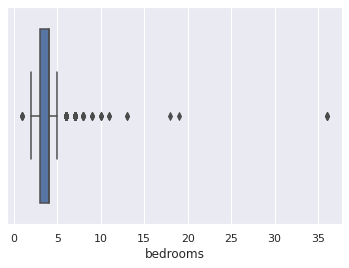

In [86]:
sns.boxplot(x=df["bedrooms"])

<AxesSubplot:xlabel='sold_price', ylabel='Count'>

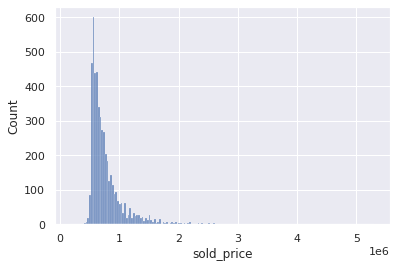

In [87]:
sns.histplot(data=df, x="sold_price")

(1880.0, 2020.0)

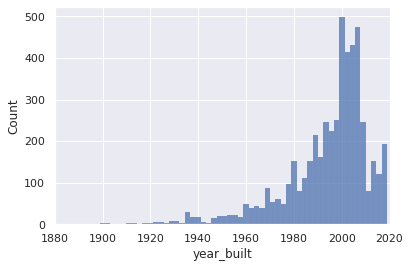

In [88]:
ax = sns.histplot(data=df, x="year_built")
ax.set_xlim(1880, 2020)

(0.0, 10.0)

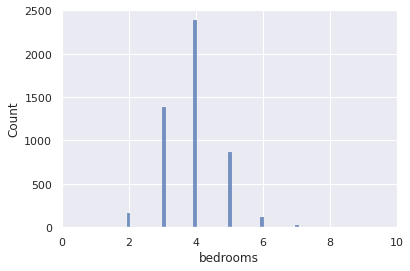

In [89]:
ay = sns.histplot(data=df, x="bedrooms")
ay.set_xlim(0, 10)

<AxesSubplot:xlabel='year_built', ylabel='sold_price'>

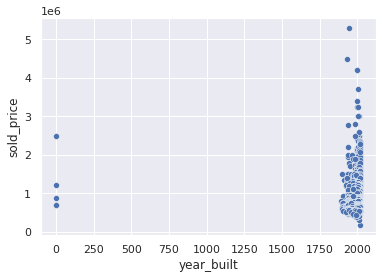

In [90]:
sns.scatterplot(data=df, x="year_built", y="sold_price")

In [91]:
median_year_built = df['year_built'].median()
df['year_built'] = df['year_built'].replace(0, median_year_built)


<AxesSubplot:xlabel='year_built', ylabel='sold_price'>

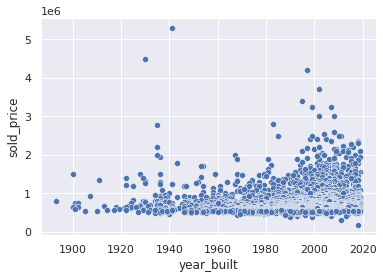

In [92]:
sns.scatterplot(data=df, x="year_built", y="sold_price")

In [93]:
mode_year = df['year_built'].mode().iloc[0]
df['year_built'] = df['year_built'].replace(0, mode_year)

<AxesSubplot:xlabel='year_built', ylabel='sold_price'>

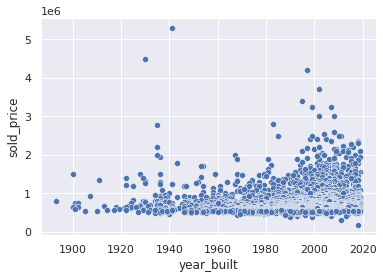

In [94]:
sns.scatterplot(data=df, x="year_built", y="sold_price")

In [95]:
df_filtered = df[df['year_built'] != 0]

<AxesSubplot:xlabel='year_built', ylabel='sold_price'>

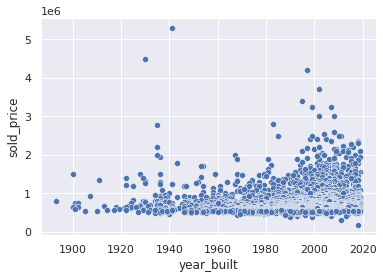

In [96]:
sns.scatterplot(data=df, x="year_built", y="sold_price")

<AxesSubplot:xlabel='year_built', ylabel='sold_price'>

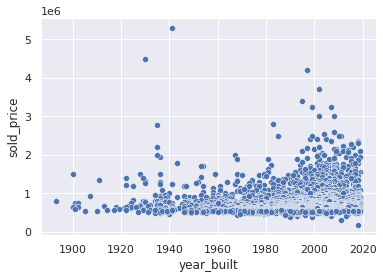

In [97]:
df_filtered = df[df['year_built'] > 0]
sns.scatterplot(data=df_filtered, x="year_built", y="sold_price")

<AxesSubplot:xlabel='zipcode', ylabel='sold_price'>

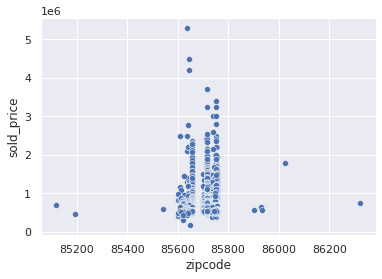

In [98]:
sns.scatterplot(data=df, x="zipcode", y="sold_price")

In [100]:
missing = df['sqrt_ft'].isnull() | (df['sqrt_ft'] == 'None')
print(df[missing])
df = df.dropna(subset=['sqrt_ft'])

      sold_price  zipcode  lot_acres     taxes  year_built  bedrooms  \
2      4200000.0    85646    1707.00  10482.00        1997         2   
490     950000.0    85646       4.40  13193.80        2008         3   
1064    785045.0    85646      73.42  20761.40        2000         2   
1373    750000.0    85622       2.72   7169.90        1995         6   
1728    565000.0    85646       0.72   4651.00        1969         3   
1731    715000.0    85622       4.72   3841.03        1998         4   
2106    550000.0    85645      50.00  25113.45        1936        36   
2108    705000.0    85614       1.06   6628.17        2007         5   
2401    685000.0    85614       1.10   5898.42        2006         3   
2447    620000.0    85646      10.31   5365.14        2004         3   
2636    565000.0    85622       2.74   3787.80        1992         2   
2915    625000.0    85614       2.01   5605.00        2007         3   
3299    540000.0    85646       0.90   8590.38        1989      

In [101]:
df = df.dropna(subset=['sqrt_ft'])

In [104]:
df = df[df["sqrt_ft"] != "None"]

<AxesSubplot:xlabel='sqrt_ft', ylabel='sold_price'>

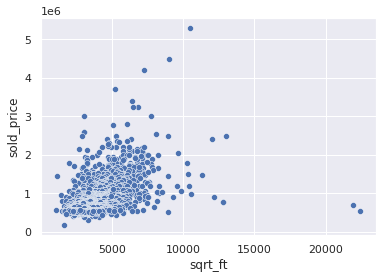

In [103]:
sns.scatterplot(data=df, x="sqrt_ft", y="sold_price")

<AxesSubplot:xlabel='bedrooms', ylabel='sold_price'>

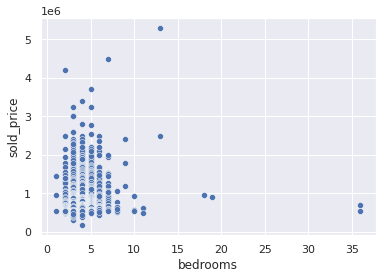

In [105]:
sns.scatterplot(data=df, x="bedrooms", y="sold_price")

<AxesSubplot:xlabel='bathrooms', ylabel='sold_price'>

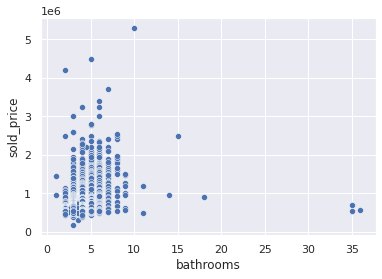

In [106]:
sns.scatterplot(data=df, x="bathrooms", y="sold_price")

In [107]:
df["HOA"].fillna(0, inplace=True)
df["sold_price"].fillna(0, inplace=True)

In [108]:
df = df.dropna(subset=["HOA", "sold_price"])

(0.0, 100.0)

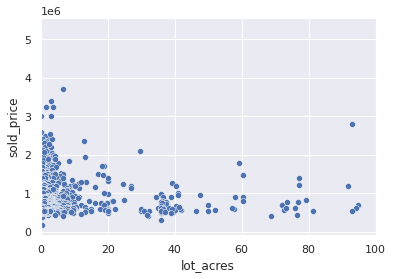

In [109]:
ao=sns.scatterplot(data=df, x="lot_acres", y="sold_price")
ao.set_xlim(0, 100)

<AxesSubplot:>

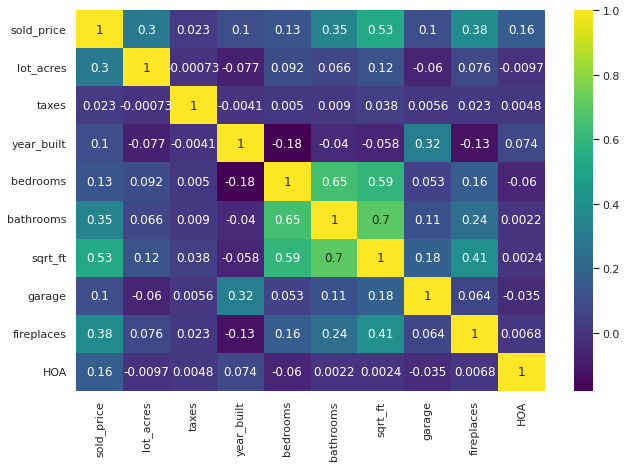

In [114]:
df = df.drop("zipcode", axis=1)
df.drop_duplicates()
plt.figure(figsize=(10.5, 7))
c = df.corr()
sns.heatmap(c, cmap='viridis', annot=True)

